In [1]:
# necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib
import pandas as pd
import seaborn as sns

import torchvision
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout

import glob

import torch.optim as optim

# visualizations libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
import cv2

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# model evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

In [3]:
! pip install -q kaggle

from google.colab import drive
drive.mount('/content/gdrive')

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

! kaggle datasets download tawsifurrahman/tuberculosis-tb-chest-xray-dataset

! unzip tuberculosis-tb-chest-xray-dataset

! rm /content/TB_Chest_Radiography_Database/Normal.metadata.xlsx
! rm /content/TB_Chest_Radiography_Database/README.md.txt
! rm /content/TB_Chest_Radiography_Database/Tuberculosis.metadata.xlsx

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
cp: cannot stat '/content/drive/MyDrive/kaggle.json': Transport endpoint is not connected
 98% 647M/663M [00:14<00:00, 38.1MB/s]
100% 663M/663M [00:14<00:00, 47.9MB/s]
Archive:  tuberculosis-tb-chest-xray-dataset.zip
  inflating: TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: TB_Chest_Radiography_Database/Norma

In [4]:
train_img = []
train_labels = []

path_train = ('/content/TB_Chest_Radiography_Database')

img_size= 112

for i in os.listdir(path_train):
    for j in os.listdir(path_train + "/" +i):
        train_img.append (cv2.resize(cv2.imread(path_train + "/" + i + '/' + j), (img_size,img_size))) 
        train_labels.append(i)
        
train_img = (np.array(train_img))

train_labels_encoded = [0 if category == 'Tuberculosis' else(1 if category == 'Normal' else(2 if category=='Unknown' else 3)) for category in list(train_labels)]

In [5]:
print("Shape of train: ",(train_img).shape)

Shape of train:  (4200, 112, 112, 3)


In [6]:
img_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen.fit(train_img)

In [7]:
train_x, val_x, train_y, val_y = train_test_split(np.array(train_img), np.array(train_labels), test_size = 0.2)
train_x.shape, train_y.shape, val_x.shape, val_y.shape

((3360, 112, 112, 3), (3360,), (840, 112, 112, 3), (840,))

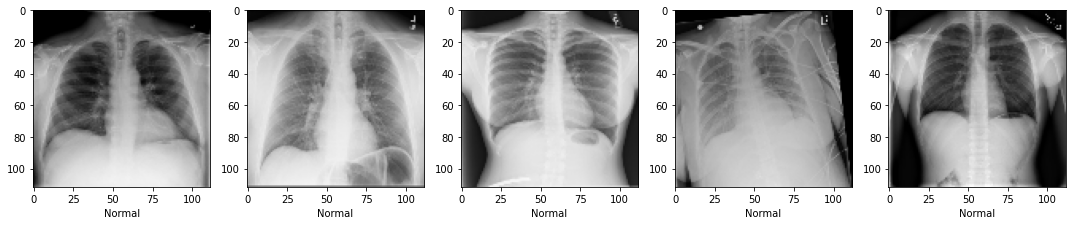

In [8]:
plt.figure(figsize = (15,15));
for i,j in enumerate(train_img):
    if i<5:
        plt.subplot(1,5,i+1)
        plt.imshow(j);
        plt.xlabel(train_labels[i]);
        plt.tight_layout()
    else:
        break

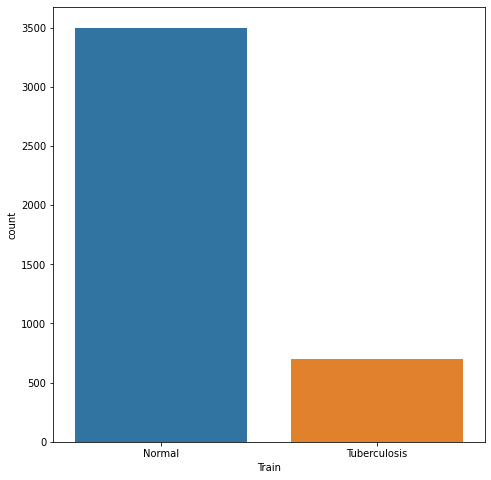

In [9]:
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([train_labels]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

In [10]:
model = tf.keras.Sequential(
        [
          tf.keras.layers.Conv2D(kernel_size=(5,5) ,filters=8, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3),filters=8, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=8, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=16, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(2, activation='sigmoid')
  ])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 3e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(tf.cast(train_img, tf.float32), np.array(pd.get_dummies(train_labels)), validation_split = 0.1, epochs = 20, verbose = 1, batch_size = 4, steps_per_epoch = 940)

Epoch 1/20
940/940 [==============================] - 7s 7ms/step - loss: 0.0045 - accuracy: 0.9981 - val_loss: 0.8027 - val_accuracy: 0.9071
Epoch 2/20
940/940 [==============================] - 7s 7ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 1.1588 - val_accuracy: 0.8976
Epoch 3/20
940/940 [==============================] - 7s 7ms/step - loss: 0.0230 - accuracy: 0.9941 - val_loss: 0.8881 - val_accuracy: 0.8762
Epoch 4/20
940/940 [==============================] - 7s 7ms/step - loss: 0.0260 - accuracy: 0.9944 - val_loss: 0.7947 - val_accuracy: 0.8810
Epoch 5/20
940/940 [==============================] - 7s 7ms/step - loss: 0.0114 - accuracy: 0.9965 - val_loss: 2.2665 - val_accuracy: 0.7833
Epoch 6/20
940/940 [==============================] - 6s 7ms/step - loss: 0.0224 - accuracy: 0.9944 - val_loss: 0.6446 - val_accuracy: 0.9286
Epoch 7/20
940/940 [==============================] - 6s 7ms/step - loss: 0.0233 - accuracy: 0.9947 - val_loss: 0.7854 - val_accuracy: 0.8929
Epoch 

In [12]:
model.layers[0].get_weights()[0].shape

(5, 5, 3, 8)

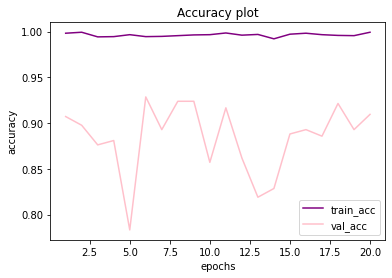

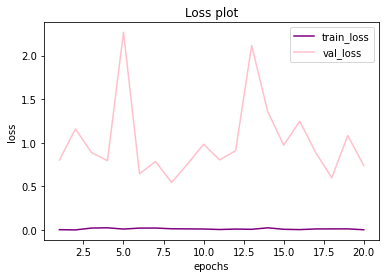

In [16]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [17]:
model.save("tuberculosis.h5")

In [23]:
CATEGORIES = ["Tuberculosis", "Normal"]

model = tf.keras.models.load_model("tuberculosis.h5")

In [24]:
def process_image(image):
    image = image
    image = cv2.resize(image, (112,112))
    return image

def predict(image_path, model):
    im = cv2.imread(image_path)
    test_image = np.asarray(im)
    processed_test_image = process_image(test_image)
    processed_test_image = np.expand_dims(processed_test_image, axis = 0)
    ps = model.predict(processed_test_image)
    return ps


In [25]:
#NORMAL TESTS
prediction = predict("/content/normal.jpg", model)

print(CATEGORIES[int(prediction[0][0])])

prediction = predict("/content/normal2.jpg", model)

print(CATEGORIES[int(prediction[0][0])])

prediction = predict("/content/normal3.jpg", model)

print(CATEGORIES[int(prediction[0][0])])

print("")

#TUBERCULOSIS TESTS
prediction = predict("/content/test.jpg", model)

print(CATEGORIES[int(prediction[0][0])])

prediction = predict("/content/test2.jpg", model)

print(CATEGORIES[int(prediction[0][0])])

prediction = predict("/content/test3.jpg", model)

print(CATEGORIES[int(prediction[0][0])])

Normal
Normal
Normal

Tuberculosis
Tuberculosis
Tuberculosis
